# Python の使い方
*introduction_to_python_ad.ipynb*

A. Date 
updated 2021.5.26

ここでは，Python の使い方を『例』を使って紹介します．
まったくの初心者向けではありません．
C言語など，ほかの言語で小さいプログラムを書いたことがある人向けです．
私が担当する講義に関係する内容が，いろいろ混ざっています．

わからないことがあれば Google 検索すると，説明されているページにたどり着けます．
とは言っても，分かりやすいページに辿り着けない場合が多いです．
もっとも正確に説明しているのは『公式ドキュメント』です．
**ぜひ公式ドキュメントを読んでください**

python 公式：（if 文， for 文， 関数）
https://docs.python.org/ja/3/tutorial/controlflow.html
<br>
numpy 公式：
https://numpy.org/doc/stable/reference/generated/numpy.arange.html
<br>
matplotlib 公式：
https://matplotlib.org/contents.html

**Pythonの起動**

Linux の場合はコマンドラインから 'python' と打ち込めば，Python が起動します． この ノートブック上でその必要はありません．<br>
まずは Python を電卓のように使ってみましょう．

すぐ下の左端にある再生ボタンを押すか．shiftキーを押しながらenterキーを押すと内容が実行されます．


In [8]:
(1+2)*(3-4)*5^2

-13

あれ？  3 ✕ (-1) ✕ 25 で， -75 になるはずだったんだが...  5^2 で 5の2乗は計算できていない模様．

In [9]:
5^2

7

In [10]:
5**3

125

In [11]:
(1+2)*(3-4)*5**2

-75

In [12]:
exp(10)*log(5)*sin(0.5*pi)

NameError: ignored

↑ わざとエラーを出しました．

In [13]:
import math

In [14]:
math.exp(10)*math.log(5)*math.sin(0.5*math.pi)

35450.22912709484

今後 math モジュールは使わない．numpy モジュールを使う！！！  （なにそれ，という人は，先に進む）

In [15]:
import numpy as np

これで  numpy を np で使えるようになる． numpy を使おう．

In [16]:
np.exp(10)*np.log(5)*np.sin(0.5*np.pi)

35450.22912709484

## **速習 Python： $ f(t) = 2\sin t$ のグラフを描く** 

これが Python で数学の関数を扱う際の基本です． ここは理解して進んでください． 
<br>
まずは，動かしてみる． 各行において， # より後ろはコメント．

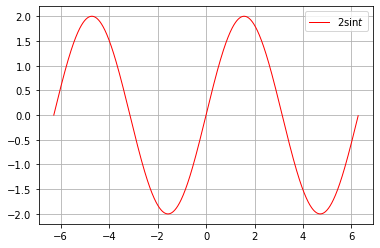

In [17]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def f(t):
  return 2.0*np.sin(t)

dt = 0.01
start = -2.0*np.pi
end = 2.0*np.pi

# 横軸 t の作成．-6.28 から 6.28 を 0.01 おきに． t と s はベクトル（配列）．
t = np.arange(start, end, dt)
s = f(t)

# 以下の2行でデータを表示．
#for i in range(t.size): 
#  print(f'{t[i]:.5f}'+'\t'+f'{s[i]:.5f}')

fig=plt.figure(0)
plt.plot (t, s, linewidth=1.0, color="r",linestyle="solid",label="$ 2\sin t $")
plt.grid()
plt.legend()
plt.show()
fig.savefig('fig321.pdf') 

ここでは，上のコードを理解するため，次の6つについて説明．

1. np.arange
2. for 文
3. range
4. .size
5. 関数 def
6. グラフの描画

最初の3行は，最初は，おまじないと思って前へ進むのがよい．

    # -*- coding: utf-8 -*-
    import numpy as np
    import matplotlib.pyplot as plt

np.arange は，これからも，よく使う.
『例』をみれば使い方がわかる．

In [18]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [20]:
np.arange(0.0,1.0, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.0 (start) から 1.0 (end) まで 0.1 おきに作成．  end が含まれないことに注意．

In [21]:
a = np.arange(0.0,1.0, 0.1)
print( type(a) )

<class 'numpy.ndarray'>


生成したもの（この場合は a）の型を知りたい場合． type(a) とすれば分かる．

各要素が等差数列にしたがうベクトルが生成される．
これは，**グラフを描くときなどに軸を離散化する必要があるのでよく使う．**
10から30（未満）までを5おきにであれば

In [22]:
np.arange(10,30,5) 

array([10, 15, 20, 25])

3番目の引数を省略すれば，公差は1になる．

In [23]:
np.arange(10,30)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

arrage とは別に linspace も使える．

In [24]:
np.linspace(10,30,20) 

array([10.        , 11.05263158, 12.10526316, 13.15789474, 14.21052632,
       15.26315789, 16.31578947, 17.36842105, 18.42105263, 19.47368421,
       20.52631579, 21.57894737, 22.63157895, 23.68421053, 24.73684211,
       25.78947368, 26.84210526, 27.89473684, 28.94736842, 30.        ])

これは 等間隔で20個（3番目の引数）を返してくる． こんどは最後の30が含まれている．

ここで，スライシングとよばれるものを簡単に紹介しておこう．

In [25]:
a = np.arange(10)   # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
b = a[3:6]  # 3 (start) から 6 (end) まで． end は含まれない．
print(b)

c = a[2:7:2]  # 2 から 7 まで 2 おきに取り出す．
print(c)

[3 4 5]
[2 4 6]


上の例で，使い方は，だいたい理解できたはず．

正確なことを知りたい場合は，『公式マニュアル』を見ればよい<br>
numpy 公式マニュアル<br>
https://numpy.org/doc/stable/reference/generated/numpy.arange.html

# **size** について

In [26]:
a = np.arange(0.0,1.0, 0.1)
print(a)
print(a.size)
print( len(a) )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
10
10


というわけで，（変数）.size は，要素数を返してくれる．
さき走って説明すると， shape というのもある．

In [27]:
a.shape

(10,)

In [28]:
A = np.array([[1, 2], [3,4]])
print( A.shape )
print (A.size )

(2, 2)
4


## **for 文と range， print 文**

for 文は，次のような形で，よく使われる．

In [29]:
for i in range(5): 
  print(i)

0
1
2
3
4


python 公式ドキュメント：（if 文， for 文， 関数） <br>
https://docs.python.org/ja/3/tutorial/controlflow.html


## 関数の定義 def hoge:

In [30]:
def hoge(u):
  return u*u

a=3
print (hoge(a))

9


u は，関数の引数．

## **print 文**

In [31]:
a = np.arange(0.0,1.0, 0.1)
print(a)
print(f'{a[3]:.5f}') # float 型 小数点以下5桁を表示

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.30000


In [32]:
a = np.random.rand(5) # 0〜1 の一様乱数を 5 つ生成
print(a)
for i in range(a.size):
  print(f'{i}'+'\t'+f'{a[i]:.20f}')   # \t は tab， f'{} は format （C言語の printf の f）

[0.12629329 0.40870594 0.29412209 0.27685884 0.30621552]
0	0.12629329123738419760
1	0.40870594388859082802
2	0.29412208542860429628
3	0.27685883754607032436
4	0.30621552053758926970


グラフの描画について

    fig=plt.figure(0)
    plt.plot (t, s, linewidth=1.0, color="r",linestyle="solid",label="$ 2\sin t $")
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig('fig321.pdf') 

matplotlib というのを使って描画している． 使い方は，コードを見ればだいたいはわかると思います． 説明は少し面倒なのでここでは省略．


公式ドキュメント：
https://matplotlib.org/contents.html

**そのほか，$\pi$ などの定数が使える．**

In [33]:
print( np.pi )
print( np.e )

3.141592653589793
2.718281828459045


## **そのそも C言語にある int とか double とか変数の型宣言は必要ないのか？**

自動で判別してくれる．

In [34]:
a =3
b = 2.1
c = a*b
d = np.array(34, np.float32) # もちろん型を指定することもできる．

In [35]:
print(a)
print(b)
print(c)
print(d)

3
2.1
6.300000000000001
34.0


In [36]:
print( type(a) )
print( type(b) )
print( type(c) )
print( type(d) )

<class 'int'>
<class 'float'>
<class 'float'>
<class 'numpy.ndarray'>


In [37]:
print( np.iinfo(np.int64) )
print( np.finfo(np.float32) )
print( np.finfo(np.float64) )

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
n

## **速習** Python： 微分方程式の例

$$ \frac{dx}{dt} = \exp (-3t)， x(0)=１ $$ 

まずは，動かしてみる． 各行 # より後ろはコメント．

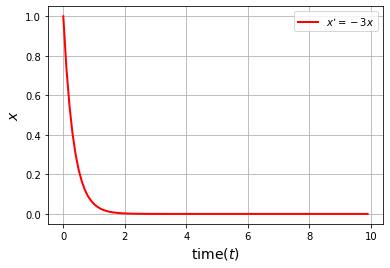

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, t):
  return [ -3.0*x[0] ]

x0 = [1.0] # 1.0 は初期値 x(0)
t = np.arange(0, 10, 0.1) # 横軸 t の作成．0 から 10 を 0.1 おきに．t はベクトル．
x = odeint(f, x0, t)  #  x にはベクトルが返ってくる．

fig=plt.figure(0) # 以下は結果の表示
plt.plot(t, x, linewidth=2, color="red", linestyle="solid",label="$x’=-3x$")
plt.xlabel('time($t$)', fontsize=14, color='black')
plt.ylabel('$x$', fontsize=14)
# plt.xlim(-1, 5) # 表示範囲を指定したい場合
# plt.ylim(-0.5, 1.2)
plt.grid()
plt.legend()
plt.show()
fig.savefig('fig_ode101.pdf') # 図の pdf ファイルを作成

# **odeint とは**

ode (ordinary differential equations，常微分方程式) <br>
公式ドキュメント:
<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

### **ベクトルの演算，ブロードキャスト**

In [39]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [40]:
b = 0.5*a
print(b)

[0.5 0.5 0.5 0.5 0.5]


In [41]:
np.arange(1,1.5,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4])

In [42]:
0*np.arange(1,1.5,0.1)

array([0., 0., 0., 0., 0.])

In [43]:
0*np.arange(1,1.5,0.1) + 0.5

array([0.5, 0.5, 0.5, 0.5, 0.5])

ベクトルに +0.5 とすることで， ５次元ベクトルの要素すべてに 0.5 が足されます．

In [44]:
a = np.arange(1,1.5,0.1) # array([1. , 1.1, 1.2, 1.3, 1.4])
np.ones(a.size)

array([1., 1., 1., 1., 1.])

In [45]:
0.5*np.ones(a.size)

array([0.5, 0.5, 0.5, 0.5, 0.5])

$ f(x) = x^2, g(x)=x^2+1 $ のグラフを描く

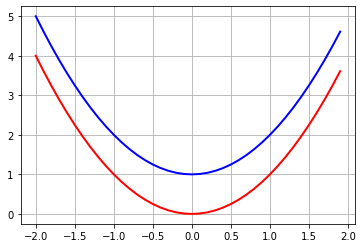

In [46]:
x = np.arange(-2, 2, 0.1) # 横軸 x の作成
f = x*x
g = x*x + 1
# print(x)

fig=plt.figure(0) # 以下は結果の表示
plt.grid()
plt.plot(x, f, linewidth=2, color="red", linestyle="solid")
plt.plot(x, g, linewidth=2, color="blue", linestyle="solid")

数学的には，おかしい （5次元ベクトルにスカラーは足せないので）．
ベクトルの要素，それぞれに 1 を足している． 
これをブロードキャスト，と言う，

In [47]:
a = np.arange(1,5,1)
print(a)

[1 2 3 4]


In [48]:
b = a + 1
print(b)

[2 3 4 5]


## **２つのベクトルの距離の計算**

In [49]:
s = np.random.randint(1,7,10) # 1 から 6 までの整数値一様乱数（サイコロを振ったときの値）を 10個生成
t = np.random.randint(1,7,10)
print(s)
print(t)
print( np.linalg.norm(s-t, ord=1) )
print( np.linalg.norm(s-t, ord=2) )

sum1 = 0
sum2 = 0
for i in range( len(s) ):
  sum1  += np.abs(s[i]-t[i])
  sum2  += (s[i]-t[i])*(s[i]-t[i])

print( sum1 )
print( np.sqrt(sum2) )

[5 5 1 6 4 4 2 2 1 4]
[1 4 4 2 3 4 2 1 2 4]
15.0
6.708203932499369
15
6.708203932499369


 乱数の使い方の公式マニュアル<br>
https://numpy.org/doc/stable/reference/random/index.html

# **ベクトル，行列の演算**

Python では，octave と同じように，
  ベクトルや行列を
  直接扱うことができる．
  線形代数を知っている人は，ちょっと戸惑う使い方を
  する場面があるが，
  「こういうふうに計算できるのか」と思って
  進むのがよい．
  まず，以下では
$$ A =
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
,~
x =
\begin{pmatrix}
5 \\
6
\end{pmatrix}
$$
として
$$ Ax =
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
\begin{pmatrix}
5 \\
6
\end{pmatrix}
=
\begin{pmatrix}
5+12 \\
15+24 
\end{pmatrix}
=
\begin{pmatrix}
17 \\
39 
\end{pmatrix}$$
を計算する例を示す．


In [50]:
A = np.array([[1, 2], [3,4]])

In [51]:
A

array([[1, 2],
       [3, 4]])

In [52]:
b = np.array([5, 6])

In [53]:
b

array([5, 6])

ちなみに，型は

In [54]:
type(A)

numpy.ndarray

In [55]:
A.shape

(2, 2)

In [56]:
b.shape

(2,)

とすれば，知ることができる．
ndarray の nd って何，とか，
(2, ~) のうしろのカンマは何，とか，
疑問はあるが，前に進もう．

In [57]:
A.dot(b)

array([17, 39])

この例でわかるように， 驚くべきことに， ベクトルに 縦ベクトルと，横ベクトルの区別が ない． 本来は，

In [58]:
b = np.array([[5], [6]])
print(b)
print(b.shape)

[[5]
 [6]]
(2, 1)


とすべきだと思うが，
そういう使い方をしているコードは，見かけない．

$$  x^{\top}A =
\begin{pmatrix}
5 & 6
\end{pmatrix}
\begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}
=
\begin{pmatrix}
5+18 & 10+24 
\end{pmatrix}
=
\begin{pmatrix}
23 & 34 
\end{pmatrix}
$$

In [59]:
b = np.array([5, 6])

In [60]:
b.dot(A)

array([23, 34])

行列 $A$ の転置 $ A^{\top}$ は

In [61]:
print(A)
print(A.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


として求まる．
行列$A$の要素は

In [62]:
A[0,0]

1

In [63]:
A[1,0]

3

などとして求まる．
ここで添字が $0$ はじまりであることに注意．
線形代数の教科書では
  $ 
A =
\begin{pmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{pmatrix}
$
としていると思うが，
ここでは
  $ 
A =
\begin{pmatrix}
a_{00} & a_{01} \\
a_{10} & a_{11}
\end{pmatrix}
$
である．
もちろん

In [64]:
A[1,1]=7

In [65]:
A

array([[1, 2],
       [3, 7]])

このように直接要素に値を代入できる．

行列については，次のような使い方をよくするので慣れておこう．
### **キーワードは，スライシングとブロードキャスト．**

In [66]:
A = np.array([[1, 2], [3,4]])
A[:,1]

array([2, 4])

`A[:,1]` は，Aの行（row）すべて，行は1行目のみ，という意味．
そもそも，行列は「たて」×「よこ」（row x column）の順に書く． (x,y) 系とは逆．

In [67]:
A[0,:]

array([1, 2])

もうすこし，大きい行列でみてみる．

In [68]:
D = np.random.rand(4,3)  # 4x3 の行列．養素は乱数．
print(D)

[[0.70207164 0.8647038  0.22355127]
 [0.91887363 0.25595658 0.62578248]
 [0.03703918 0.57514672 0.51291689]
 [0.18356185 0.17155687 0.7058781 ]]


次の例． D[1:3,2]  とすると， 行列 D のうち，どこが取れるか，確認しよう．

In [69]:
print( D[1:3,2] )

[0.62578248 0.51291689]


 D[1:3,2] とすると， たて（r, row）が 1から3まで（0はじまり． 3は含まれない），よこ（c, column）が 2 の部分行列をとってくることになる． これはややこしい？

In [70]:
A = np.array([[1, 2], [3,4]])
print(A[:,1])
print(A[0:2,1])    # 先の例は，これを指定したのと同じ

[2 4]
[2 4]


次は掛け算についてのコメント．

In [71]:
B = np.array([[1.0, 1.0/2.0], [1.0/3.0,1.0/4.0]])
print(A)
print(B)

[[1 2]
 [3 4]]
[[1.         0.5       ]
 [0.33333333 0.25      ]]


のとき

In [72]:
print( A*B )
print( A.dot(B) )

[[1. 1.]
 [1. 1.]]
[[1.66666667 1.        ]
 [4.33333333 2.5       ]]


となる． * を使うと，要素ごとの掛け算が求まる．

In [73]:
A = np.array([[1, 2], [3,4]])
b = np.array([1, 0])
print(A)
print(2*A)
print( b*A )
print( A*b )

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]
[[1 0]
 [3 0]]
[[1 0]
 [3 0]]


In [74]:
A = np.array([[1, 2], [3,4], [5,6]] ) 
b = np.array([1, 2])
c = np.array([1, 2, 3])
c = c.reshape(-1, 1)

print(c)
print(A)
print(A*c)
print(A*b)

[[1]
 [2]
 [3]]
[[1 2]
 [3 4]
 [5 6]]
[[ 1  2]
 [ 6  8]
 [15 18]]
[[ 1  4]
 [ 3  8]
 [ 5 12]]


# **数値演算関数**

Python には数値演算のための関数が多く組み込まれている．
 例えば

In [75]:
np.cos(1/3.0*np.pi)

0.5000000000000001

$ \cos \left ( \dfrac{2}{3} \pi \right )  = \dfrac{1}{2}$なので，
ちょっと不安になるが，まあよい．
引数がベクトルや行列であれば，
要素すべての値を計算してくれる．

In [76]:
np.sin([1,2,3,4])

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [77]:
np.sin(b)

array([0.84147098, 0.90929743])

$\sin, \cos$ のほかにも，

In [78]:
np.exp(1)

2.718281828459045

In [79]:
np.log(10)

2.302585092994046

In [80]:
np.e

2.718281828459045

In [81]:
np.sqrt(3)

1.7320508075688772

など，だいたいのものはある．
各関数の説明は help(np.sqrt) 

In [ ]:
help(np.sqrt)

などとして参照できる．
ベクトル要素の最大値，最小値，和，積は

In [82]:
x = np.array([1, 3, 5, 2, 3])
print(x)

[1 3 5 2 3]


In [83]:
x.max()

5

一番大きい要素がどの場所（インデックス）にあるか知りたければ

In [84]:
np.argsort(x)[::-1]

array([2, 4, 1, 3, 0])

In [85]:
index = np.argsort(x)[::-1]
print( index[0])

2


In [ ]:
help(np.argsort)

In [87]:
x.min()

1

In [88]:
x.sum()

14

In [89]:
x.prod()   # すべての養素の掛け算

90

として取得できる．
ほかにも

In [90]:
np.amax(x)

5

というのがある．
要素の中にひとつでもNaNが含まれている場合，
NaNが最大値として返される．
返して欲しくない場合には、nanmaxを使う．


In [91]:
A = np.array([[1, 2, 3, 4], [5,6,7,8]])
print (A)

[[1 2 3 4]
 [5 6 7 8]]


In [92]:
np.sum(A)

36

In [93]:
np.mean(A)    # 36/8 = 4.5

4.5

In [94]:
np.sum(A,axis=0) #  axis=0 は，たて方向に足す，という意味

array([ 6,  8, 10, 12])

In [95]:
np.mean(A,axis=0)

array([3., 4., 5., 6.])

In [96]:
np.mean(A,axis=1) # axis=1 は，よこ方向に平均をとる，という意味

array([2.5, 6.5])

In [97]:
np.sum(A,axis=1)

array([10, 26])

In [ ]:
help(np.sum)

In [99]:
a = np.array([1, 2, 3, 4, 5, 6])
print( np.mean(a) )
print( np.std(a) )
print( np.var(a) )
np.sqrt( np.var(a) )

3.5
1.707825127659933
2.9166666666666665


1.707825127659933

In [100]:
np.std(A) # A の要素の標準偏差

2.29128784747792

# 行列式，逆行列

In [101]:
A = np.array([[1, 2], [3,4]])

In [102]:
A

array([[1, 2],
       [3, 4]])

In [103]:
np.linalg.det(A)  # 行列式

-2.0000000000000004

In [104]:
B=np.linalg.inv(A) # 逆行列
print( B )

[[-2.   1. ]
 [ 1.5 -0.5]]


In [105]:
A.dot(B)  # 行列どうしの掛け算

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [106]:
B.dot(A)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

なんとも簡単に求めることができる．
次に，
行列$A$の固有値，
固有ベクトルを求めてみよう．

In [107]:
np.linalg.eig(A)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

固有値が，[-0.37228132,  5.37228132] の2つで，
それぞれの固有値に対応する固有ベクトルが，
[-0.82456484, -0.41597356],
[ 0.56576746, -0.90937671]
ということである．
固有ベクトルは，手計算だと要素が整数値でいちばん簡単なものを求めるが，ここでは長さ1に正規化されている．
ベクトル要素の平均，
標準偏差，分散は


In [108]:
x

array([1, 3, 5, 2, 3])

In [109]:
np.sum(x)/5.0

2.8

In [110]:
np.mean(x)

2.8

In [111]:
np.std(x)

1.32664991614216

In [112]:
np.var(x)

1.7600000000000005

で得られる．

In [113]:
np.sqrt( np.var(x))

1.32664991614216

たしかに標準偏差と分散の関係は成り立っている．

# 乱数の生成

まずは，
（0から1までの間の）一様乱数．

In [114]:
x = np.random.rand()

In [115]:
x

0.09695103572230102

In [116]:
x = np.random.rand(10)

In [117]:
x

array([0.1570578 , 0.7203045 , 0.97234655, 0.46950307, 0.68913042,
       0.31232962, 0.99618524, 0.28512072, 0.71091298, 0.35016841])

In [118]:
x = np.random.rand(2,2)

In [119]:
x

array([[0.86645211, 0.91005077],
       [0.50614649, 0.83401694]])

平均0，分散1の標準正規分布にしたがう乱数は， randn という関数を使えばよい．

In [120]:
x = np.random.randn()

In [121]:
x

-0.10055491847403182

In [122]:
x = np.random.randn(10)

In [123]:
x

array([ 0.5058132 ,  0.9539231 , -1.06258171,  0.6943952 , -0.85586638,
        0.14229468,  0.18827408,  0.71595026,  0.27479419,  0.89595848])

として生成できる．
乱数の種（seed）は

In [124]:
np.random.seed(20180822)

サンプル（標本）の平均 mean = -0.0018938615851860248
サンプルの標準偏差 s.d. = 0.9920614983970748
サンプルの分散 variance = 0.9841860166018492


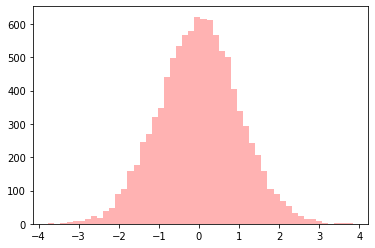

In [125]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.random.randn(10000)
print ('サンプル（標本）の平均 mean =', np.mean(x))
print ('サンプルの標準偏差 s.d. =', np.std(x))
print ('サンプルの分散 variance =', np.var(x))
 
plt.figure()
plt.hist(x, bins=50, alpha=0.3, histtype='stepfilled', color='r')
# plt.hist(x+2, bins=100, alpha=0.3, histtype='stepfilled', color='b')
plt.show()
# plt.savefig("hist101.pdf")

±1σ，±３σの意味

0.6839
0.9557
0.997


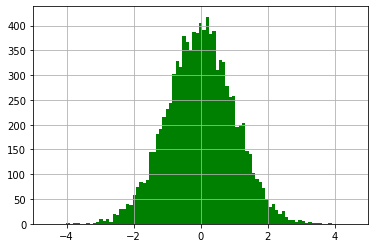

In [126]:
import numpy
import matplotlib.pyplot as plt

T = 10000
mu = 0.0
sigma = 1.0

y = []
n1=0; n2=0; n3=0
for i in range(T):
    r = np.random.randn(1)
    y.append(r)
    if r > mu - sigma and r < mu + sigma:
        n1 +=1
    if r > mu - 2.0*sigma and r < mu + 2.0*sigma:
        n2 +=1
    if r > mu - 3.0*sigma and r < mu + 3.0*sigma:
        n3 +=1

y = numpy.array(y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(y, bins=101, range=(-5, 5), density=False, facecolor='g')
ax.set_xlim(-5, 5)
ax.grid(True)

print (float(n1)/float(T))
print (float(n2)/float(T))
print (float(n3)/float(T))

# plt.savefig(ss108.jpg)   # 図のファイルを作りたいとき
plt.show()

数学の試験の得点のシミュレーション（平均71.5点，標準偏差9.0点，100人）

サンプル（標本）の平均 mean = 71.55046064431946
サンプルの標準偏差 s.d. = 8.607990079623312
サンプルの分散 variance = 74.09749321089335


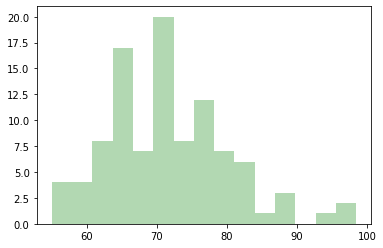

In [127]:
import numpy as np
import matplotlib.pyplot as plt

mu = 71.5
sigma = 9.0 

x = np.random.randn(100)
x = sigma*x + mu

print ('サンプル（標本）の平均 mean =', np.mean(x))
print ('サンプルの標準偏差 s.d. =', np.std(x))
print ('サンプルの分散 variance =', np.var(x))
 
plt.figure()
plt.hist(x, bins=15, alpha=0.3, histtype='stepfilled', color='g')
plt.show()

# 数の並べかえ

In [128]:
x = np.random.randn(10)
print(x)

[-0.43161951 -0.16503146 -2.16210328 -0.48501018 -0.33860401  0.29853869
 -0.16922876  2.23054145 -0.43644241 -1.49995701]


In [129]:
np.sort(x)

array([-2.16210328, -1.49995701, -0.48501018, -0.43644241, -0.43161951,
       -0.33860401, -0.16922876, -0.16503146,  0.29853869,  2.23054145])

In [130]:
np.argsort(x)

array([2, 9, 3, 8, 0, 4, 6, 1, 5, 7])

# グラフ描画関数

Python の matplotlib には，
 グラフ作成のための関数が多数準備されている．
まず，matplotlib.pyplot を plt で呼び出せるようにしておく．

In [131]:
import matplotlib.pyplot as plt

まずは，
$ y = \sin x $ のグラフから．

In [132]:
x = np.arange(-2, 2, 0.1)

In [133]:
y=np.sin(x)

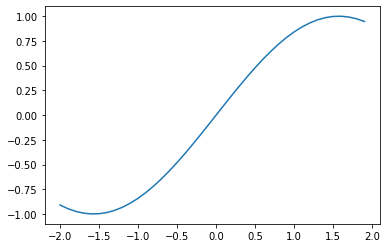

In [134]:
plt.plot(x, y)

本来は plt.show() を入力しなければ，グラフは描かれない

ヒストグラムは

In [135]:
x = np.random.randn(1000)  # 標準正規分布にしたがう乱数を1000個生成

(array([  4.,   4.,   8.,  30.,  36.,  66.,  80., 100., 133.,  96., 118.,
        114.,  79.,  52.,  39.,  23.,  10.,   6.,   1.,   1.]),
 array([-2.94566214, -2.63222969, -2.31879723, -2.00536478, -1.69193232,
        -1.37849986, -1.06506741, -0.75163495, -0.43820249, -0.12477004,
         0.18866242,  0.50209488,  0.81552733,  1.12895979,  1.44239225,
         1.7558247 ,  2.06925716,  2.38268962,  2.69612207,  3.00955453,
         3.32298699]),
 <a list of 20 Patch objects>)

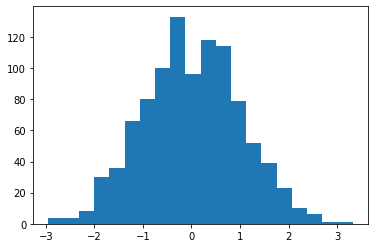

In [136]:
plt.hist(x, bins=20)  #棒の数が20本のヒストグラムを作成

で描ける．

3次元的なグラフ．

### **「指数関数」の感覚**

手でグラフを描いてきたときの感覚と違う

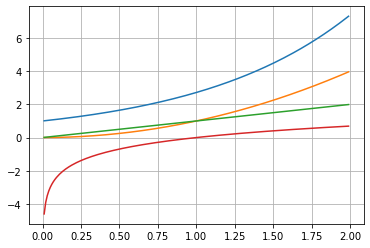

In [137]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.01,2,0.01)
y = np.exp(x)

plt.grid()
# plt.gca().set_aspect("equal")
plt.plot(x, y)
plt.plot(x, x*x)
plt.plot(x, x)
plt.plot(x, np.log(x))

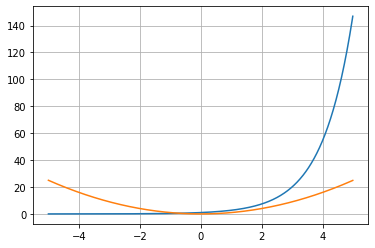

In [138]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5,0.01)
y = np.exp(x)

plt.grid()
plt.plot(x, y)
plt.plot(x, x*x)
# plt.plot(x, np.log(x))

ほう， exp(x) というのは 1 くらいから急激に立ち上がるのか．

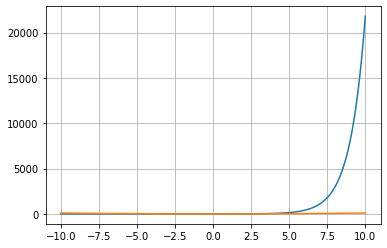

In [139]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10,0.01)
y = np.exp(x)

plt.grid()
plt.plot(x, y)
plt.plot(x, x*x)

いやいや， exp(x) というのは 5 くらいから急激に立ち上がるのよ．

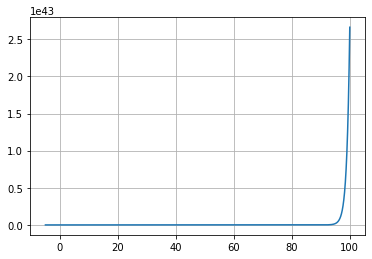

In [140]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,100,0.01)
y = np.exp(x)

plt.grid()
plt.plot(x, y)

いやいや， exp(x) というのは 95 くらいから急激に立ち上がるのでは？  

いろいろなグラフ

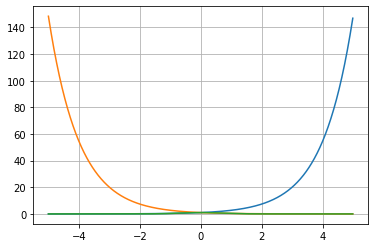

In [267]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5, 0.01)
y = np.exp(x)
y2 = np.exp(-x)
y3 = np.exp( -x**2)
y4 = 1/x

plt.grid()
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
# plt.plot(x, y4)

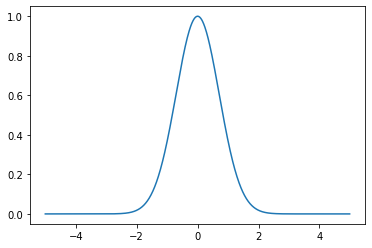

In [141]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5, 0.01)
y3 = np.exp( -x**2)

plt.plot(x, y3)

y = x-1 と y = log x

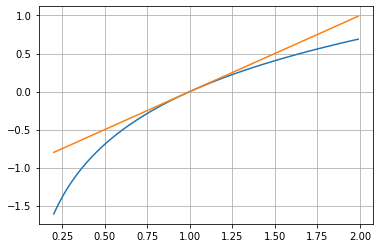

In [142]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.2,2,0.01)

plt.grid()
plt.plot(x, np.log(x))
plt.plot(x, x-1)

### **ここから先，工事中． きちんとできていないので注意！！！**

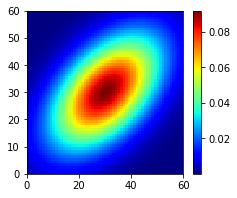

In [143]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def g2_pdf(x,y,mu,Sigma):
    a = 1.0/(2.0*np.pi*np.sqrt(np.linalg.det(Sigma)))
    v = np.array([[x],[y]]) - mu
    retvar = a*np.exp(-1.0/2.0*(v.T).dot( (np.linalg.inv(Sigma)).dot(v) ))
    return retvar

mu = np.array([[0],[0]])
Sigma = np.array([[2,1],[1,2]]) # 分散・共分散行列

x = np.arange(-3,3,0.1)
y = np.arange(-3,3,0.1)
nx = len(x)
ny = len(y)
z = np.zeros((nx,ny))
for i0 in range(nx):
    for i1 in range(ny):
        z[i1,i0] = g2_pdf(x[i0],y[i1], mu, Sigma)

plt.figure(figsize=(3.5,3))
#plt.gray()
plt.jet()
plt.pcolor(z)
#plt.contour(z)
plt.colorbar()
plt.show()

これは2次元だった．こちらが3次元．

以前はうごいていたが，いまは動かない． なぜか．．．

<p>

つぎのは動かすと危険．

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def g2_pdf(x,y,mu,Sigma):
    a = 1.0/(2.0*np.pi*np.sqrt(np.linalg.det(Sigma)))
    v = np.array([[x],[y]]) - mu
    retvar = a*np.exp(-1.0/2.0*(v.T).dot( (np.linalg.inv(Sigma)).dot(v) ))
    return retvar

mu = np.array([[0],[0]])
Sigma = np.array([[2,1],[1,2]]) # 分散・共分散行列

x = np.arange(-5,5,0.2)
y = np.arange(-5,5,0.2)
nx = len(x)
ny = len(y)
z = np.zeros((nx,ny))
for i0 in range(nx):
    for i1 in range(ny):
        z[i1,i0] = g2_pdf(x[i0],y[i1], mu, Sigma)

xx,yy = np.meshgrid(x,y)
plt.figure(figsize=(5, 3.5))
ax = plt.subplot(1,1,1, projection='3d')
ax.plot_surface(xx,yy,z,rstride=1,cstride=1,alpha=0.1,color='blue',edgecolor='black')
# ax.set_zticks((0,0.08))
ax.view_init(30,-130)
plt.savefig('fig301.eps') 
plt.show()

unix コマンドが使える．

In [144]:
!ls -l

total 32
-rw-r--r-- 1 root root 10730 May 26 07:47 fig321.pdf
-rw-r--r-- 1 root root 13851 May 26 07:48 fig_ode101.pdf
drwxr-xr-x 1 root root  4096 May  6 13:44 sample_data


In [223]:
from google.colab import files
files.download("fig321.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補足

ライブラリ numpy を使うには

In [ ]:
import numpy as np

などと書いてきた．

In [ ]:
import numpy

と書いた場合は，
np と省略して書いてきた部分を，
numpy と書く必要がある．
ライブラリは，他によくつかうものとして，
math がある．
numpy にも math にも，cos() という関数（メソッド名）がある．

In [ ]:
from numpy import sin, cos

In [ ]:
from numpy import *

と書くと，
numpy のすべての関数が使えるようになる．

# digit.mat （パターン認識の講義用です）

digit.mat ファイルを google colaboratory の中で使えるようにアップロードしておく．digit.mat には 16 x 16 ピクセルのモノクロの手書き数字画像が 1文字あたり500枚用意されている．

digit.mat って何？ という場合は，ここはスキップ．


In [ ]:
from google.colab import files
f= files.upload()

Saving digit.mat to digit.mat


In [ ]:
import scipy.io
data = scipy.io.loadmat("digit.mat")
type(data)

dict

In [ ]:
type(data["X"])

numpy.ndarray

In [ ]:
x = data["X"]

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x.shape

(256, 500, 10)

これを (256,5000, 16,16) につくりかえる．

In [ ]:
[d, n, nc] = x.shape
z = x.reshape(d, n*nc)
z.shape # (256, 5000)

(256, 5000)

# sklearn を使えるようにするためには．

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X = digits.data
y = digits.target
images = digits.images
type(digits)

sklearn.utils.Bunch

In [ ]:
type(images)

numpy.ndarray

In [ ]:
images.shape

(1797, 8, 8)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import pandas as pd
digits_data = datasets.load_digits()
digits_df = pd.DataFrame(digits_data.data)
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


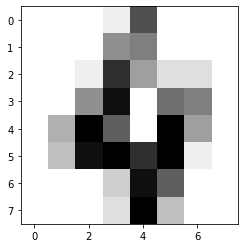

In [ ]:
plt.imshow(digits_df.loc[4,:].values.reshape(8,8), cmap=plt.cm.gray_r)

### これから追加して説明したいこと